In [1]:
# Import necessary libraries
from fnal import Dataset
from infn import INFNDataset
from utilities import plot_crate, plot_tpc

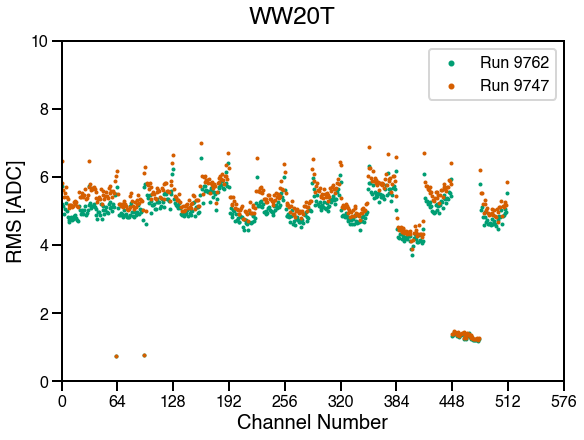

In [2]:
# Test plotting of mini-crate noise metrics.
input_path = '/Volumes/MUSB/data'
data = [Dataset(input_path, x) for x in [9762, 9747]]
labels = ['Run 9762', 'Run 9747']
plot_crate(data, labels, 'rawrms', 'WW20T')

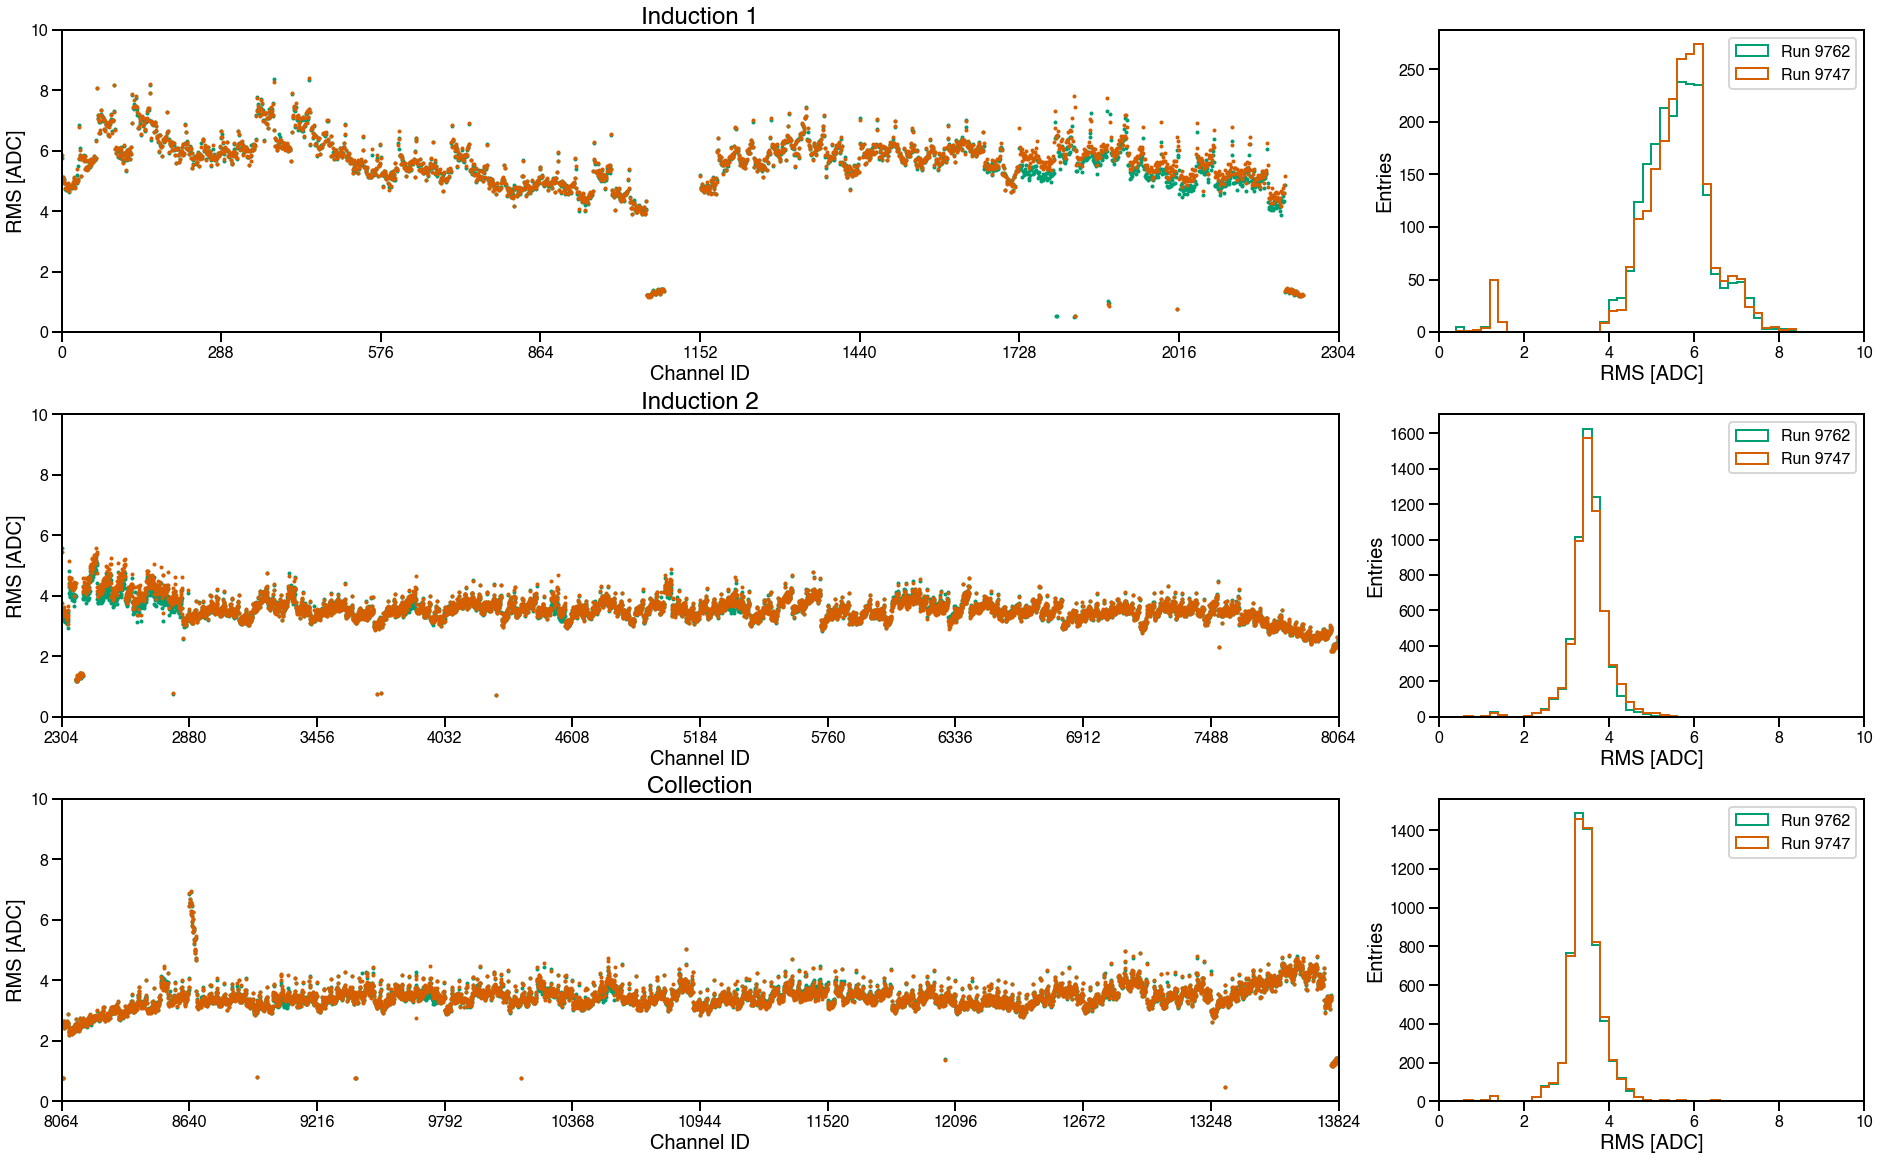

In [3]:
# Test plotting of the TPC noise metrics.
plot_tpc(data, labels, 'rawrms', 0)

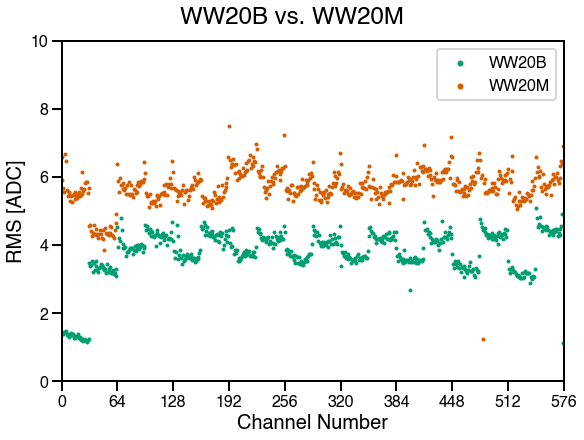

In [4]:
# Test plotting different components against each other.
data = [data[0], data[0]]
labels = ['WW20B', 'WW20M']
plot_crate(data, labels, 'rawrms', ['WW20B', 'WW20M'])

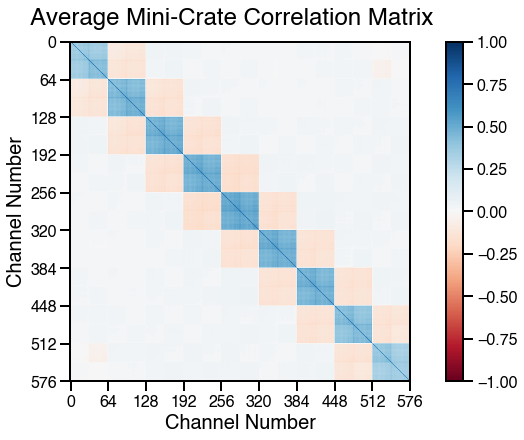

In [5]:
# Test correlation matrix for FNAL data.
data[0].plot_correlation_matrix('all')

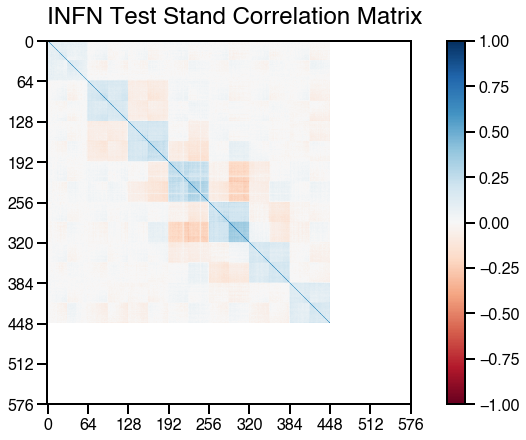

In [6]:
# Test INFN data parsing and noise analysis.
data_infn = INFNDataset('/Volumes/MUSB/infn_data/RUN_100264', 5)
data_infn.plot_correlation_matrix()

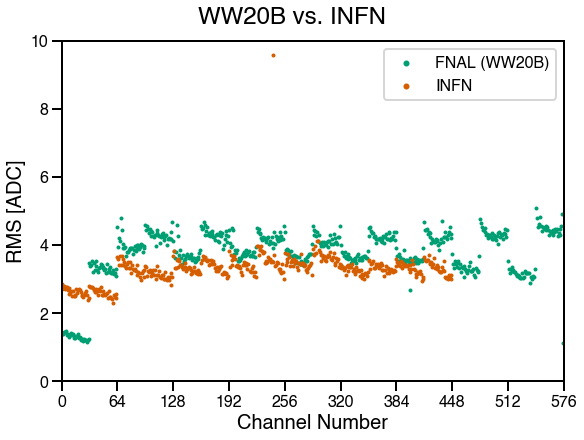

In [7]:
# Test comparison of INFN and FNAL data.
labels = 'FNAL (WW20B)', 'INFN'
plot_crate([data[0], data_infn], labels, 'rawrms', ['WW20B', 'INFN'])